### import Modules

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline
plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()

from sklearn.metrics import mean_squared_error

import xgboost as xgb

### Read and merge data with continents

In [237]:
continent = pd.read_csv("C:\\Users\\timon\\Downloads\\csvData.csv")
continent.head()

,country,continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa


In [238]:
corona_df = pd.read_csv("C:\\Users\\timon\\OneDrive\\Desktop\\covid-hospitalizations.csv")
corona = pd.read_csv("C:\\Users\\timon\\OneDrive\\Desktop\\covid-hospitalizations.csv")
corona = corona.merge(continent, left_on="entity", right_on="country", how = "left")

corona

,entity,iso_code,date,indicator,value,country,continent
0,Algeria,DZA,2020-07-17,Daily ICU occupancy,62.000,Algeria,Africa
1,Algeria,DZA,2020-07-17,Daily ICU occupancy per million,1.390,Algeria,Africa
2,Algeria,DZA,2020-07-18,Daily ICU occupancy,67.000,Algeria,Africa
3,Algeria,DZA,2020-07-18,Daily ICU occupancy per million,1.502,Algeria,Africa
4,Algeria,DZA,2020-07-20,Daily ICU occupancy,64.000,Algeria,Africa
...,...,...,...,...,...,...,...
130163,United States,USA,2022-03-09,Daily ICU occupancy per million,14.694,United States,North America
130164,United States,USA,2022-03-09,Daily hospital occupancy,24825.000,United States,North America
130165,United States,USA,2022-03-09,Daily hospital occupancy per million,74.569,United States,North America
130166,United States,USA,2022-03-09,Weekly new hospital admissions,22773.000,United States,North America


In [239]:
df = corona.copy()

In [240]:
df = df.groupby("date").mean()

corona = corona.groupby(["continent", "date"]).sum()

In [241]:
#corona = corona.set_index("date")
corona.head()

value
continent date                
Africa    2020-05-02   273.480
          2020-05-09   396.495
          2020-05-16   469.695
          2020-05-23  1099.004
          2020-05-30  1449.750

In [242]:
df.head()

,value
date,
2020-01-06,0.219375
2020-01-18,0.219375
2020-02-12,0.146250
2020-02-24,19.441875
2020-02-25,15.818333


In [243]:
pd.to_datetime(df.index)

DatetimeIndex(['2020-01-06', '2020-01-18', '2020-02-12', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01',
               ...
               '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06',
               '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10',
               '2022-03-11', '2022-03-12'],
              dtype='datetime64[ns]', name='date', length=751, freq=None)

<AxesSubplot:title={'center':'corona_overall'}, xlabel='date'>

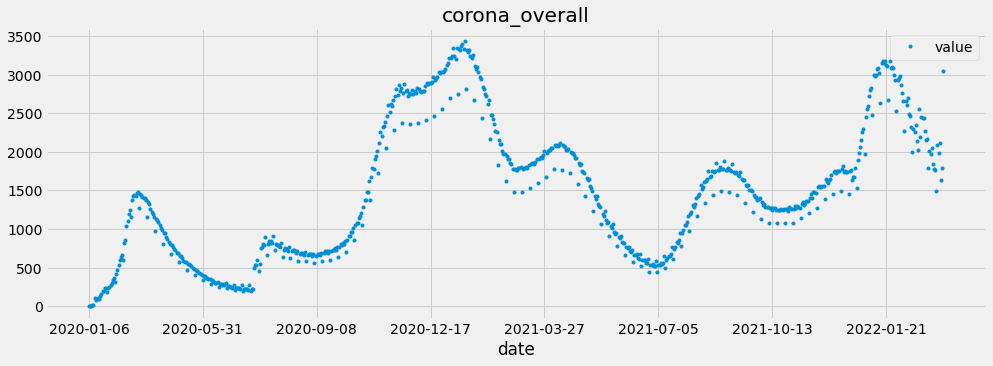

In [244]:
df.plot(style = '.', figsize=(15,5), title = "corona_overall", color = color_pal[0])

<AxesSubplot:xlabel='date', ylabel='value'>

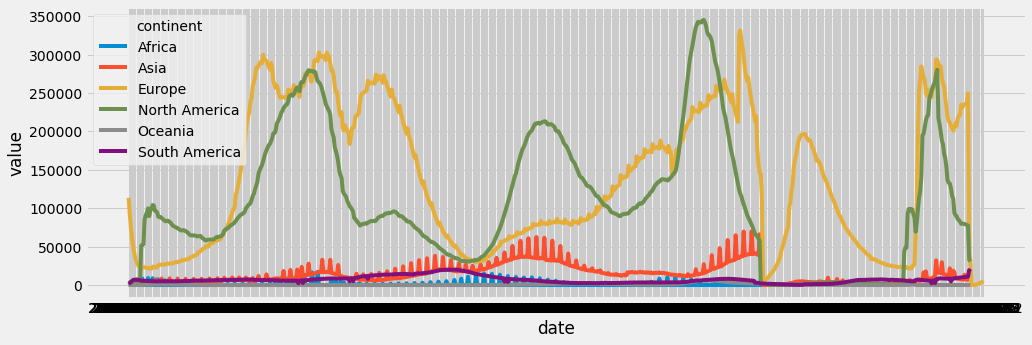

In [245]:
plt.figure(figsize = (15,5))
sns.lineplot(data = corona, x = "date", y = "value", hue="continent")

In [246]:
corona_df

,entity,iso_code,date,indicator,value
0,Algeria,DZA,2020-07-17,Daily ICU occupancy,62.000
1,Algeria,DZA,2020-07-17,Daily ICU occupancy per million,1.390
2,Algeria,DZA,2020-07-18,Daily ICU occupancy,67.000
3,Algeria,DZA,2020-07-18,Daily ICU occupancy per million,1.502
4,Algeria,DZA,2020-07-20,Daily ICU occupancy,64.000
...,...,...,...,...,...
130163,United States,USA,2022-03-09,Daily ICU occupancy per million,14.694
130164,United States,USA,2022-03-09,Daily hospital occupancy,24825.000
130165,United States,USA,2022-03-09,Daily hospital occupancy per million,74.569
130166,United States,USA,2022-03-09,Weekly new hospital admissions,22773.000


In [247]:
#corona_df.drop(["entity", 'iso_code', 'indicator'], axis= 1,  inplace = True)
corona_df.tail()

,entity,iso_code,date,indicator,value
130163,United States,USA,2022-03-09,Daily ICU occupancy per million,14.694
130164,United States,USA,2022-03-09,Daily hospital occupancy,24825.000
130165,United States,USA,2022-03-09,Daily hospital occupancy per million,74.569
130166,United States,USA,2022-03-09,Weekly new hospital admissions,22773.000
130167,United States,USA,2022-03-09,Weekly new hospital admissions per million,68.405


In [248]:
#corona_df = corona_df.set_index("date")

<AxesSubplot:>

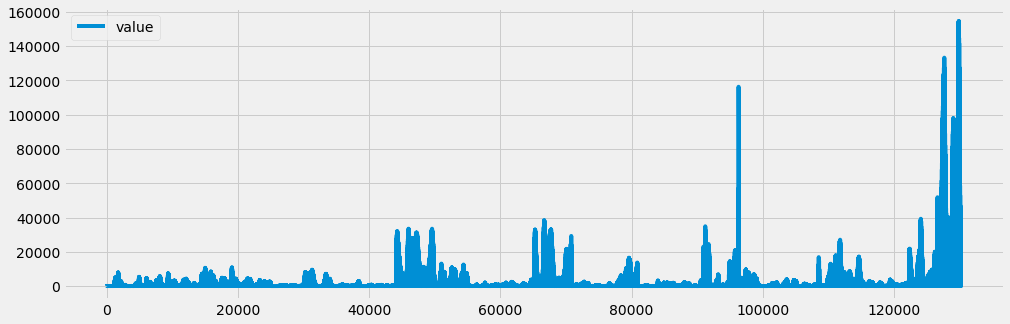

In [249]:
corona_df.plot(figsize=(15,5))

In [250]:
df.index.max()

'2022-03-12'

In [251]:
#date column to datetime
df.index = pd.to_datetime(df.index)

df.index

DatetimeIndex(['2020-01-06', '2020-01-18', '2020-02-12', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01',
               ...
               '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06',
               '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10',
               '2022-03-11', '2022-03-12'],
              dtype='datetime64[ns]', name='date', length=751, freq=None)

### plot graph and select predicted area

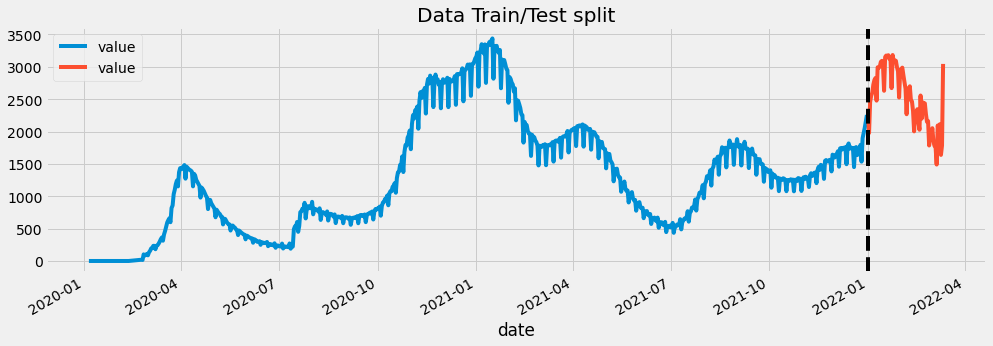

In [254]:
train = df.loc[df.index < '2022-01-01']
test = df.loc[df.index >= '2022-01-01']

fig, ax= plt.subplots(sharex=True, figsize=(15,5))
train.plot(ax =ax,label = "Training Set", title = 'Data Train/Test split')
test.plot(ax = ax,label = "Test Set")
plt.axvline('2022-01-01', color = 'black', ls= '--')
plt.show()

<AxesSubplot:xlabel='date'>

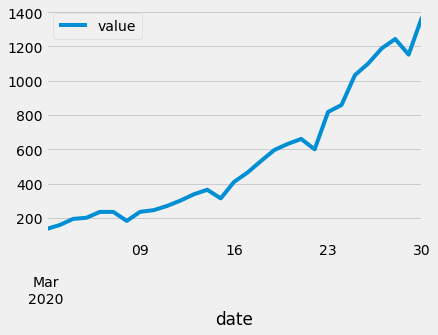

In [258]:

df.loc[(df.index > '2020-03-01') & (df.index <'2020-03-31')].plot()


### wrirte function to extract features out of datetime

In [218]:
def create_feature(df):
    """
    create time series features based on date index
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['month'] =df.index.month
    df['quarter'] =df.index.quarter
    df['year'] =df.index.year
    df['dayofyear'] =df.index.dayofyear

    return df

In [259]:
df = create_feature(df)

### Little EDA

Text(0.5, 1.0, 'Corona cases based on quarter')

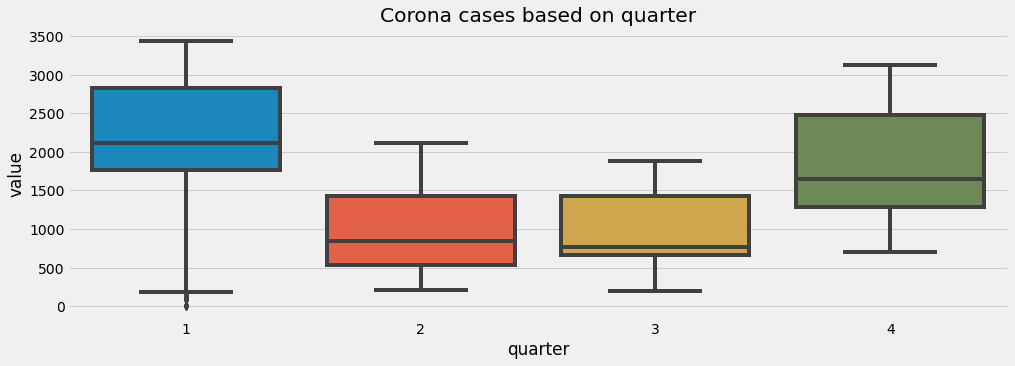

In [260]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='quarter', y ='value')
plt.title('Corona cases based on quarter')

Text(0.5, 1.0, 'Corona cases based on month')

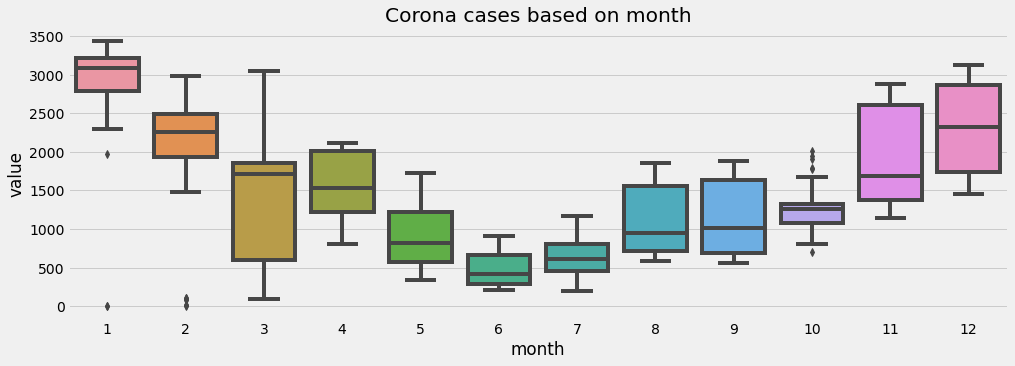

In [261]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='month', y ='value')
plt.title('Corona cases based on month')

In [262]:
#prepare datasets
train = create_feature(train)
test = create_feature(test)

C:\Users\timon\AppData\Local\Temp\ipykernel_3552\2261876988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
C:\Users\timon\AppData\Local\Temp\ipykernel_3552\2261876988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] =df.index.month
C:\Users\timon\AppData\Local\Temp\ipykernel_3552\2261876988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [270]:
#select features
features = ['dayofweek', 'month', 'quarter', 'year', 'dayofyear']
target = 'value'

### Train Test Split:

In [271]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

### Fitting and training the model

In [273]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds = 50,
                        learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[10:14:28] WARNING: ..\src\learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1573.22229	validation_1-rmse:2547.29004
[100]	validation_0-rmse:606.95294	validation_1-rmse:974.30615
[200]	validation_0-rmse:244.22855	validation_1-rmse:455.39911


c:\Users\timon\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[300]	validation_0-rmse:109.26293	validation_1-rmse:346.54926
[400]	validation_0-rmse:57.43534	validation_1-rmse:337.32809
[500]	validation_0-rmse:36.22311	validation_1-rmse:340.37631
[600]	validation_0-rmse:26.52571	validation_1-rmse:342.37512
[700]	validation_0-rmse:22.31402	validation_1-rmse:344.00732
[800]	validation_0-rmse:19.92263	validation_1-rmse:344.94513
[900]	validation_0-rmse:17.89401	validation_1-rmse:345.37418
[999]	validation_0-rmse:16.39216	validation_1-rmse:345.47427


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:>

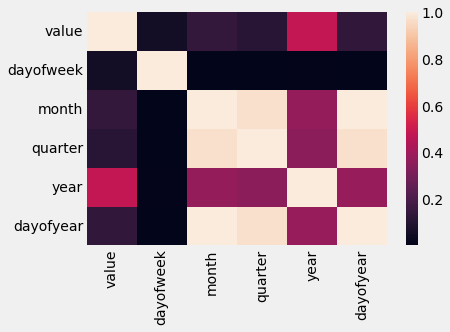

In [284]:
#correlation plot is not directly correlation with the feature importances of the xgboost algorithm...
sns.heatmap(df.corr().abs())

In [282]:
pd.DataFrame(data = reg.feature_importances_,
            index = features)

,0
dayofweek,0.004631
month,0.019395
quarter,0.000000
year,0.608788
dayofyear,0.367187


In [288]:
fi = pd.DataFrame(data = reg.feature_importances_,
            index = features,
            columns=['importance'])

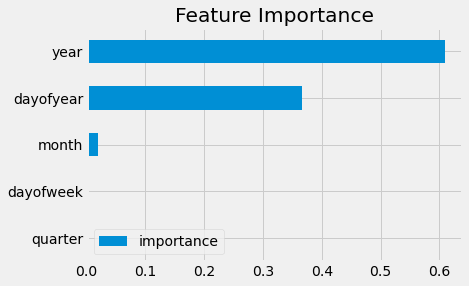

In [289]:
fi.sort_values('importance').plot(kind='barh', title = 'Feature Importance')
plt.show()

C:\Users\timon\AppData\Local\Temp\ipykernel_3552\618234325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


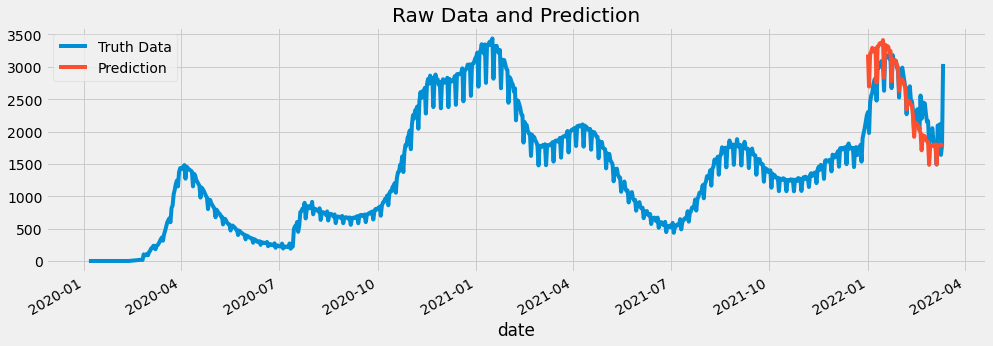

In [294]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how = 'left', left_index=True, right_index = True)

ax = df[['value']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Prediction'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [297]:
score = np.sqrt(mean_squared_error(test['value'], test['prediction']))

print(f'RMSE Score on Test set: {score: 0.2f}')

RMSE Score on Test set:  345.47


In [309]:
# worse predicted values

test['error'] = np.abs(test[target] - test['prediction'])
#test['date'] = test.index.date
test.groupby('date')['error'].mean().sort_values(ascending = False).head(5)

C:\Users\timon\AppData\Local\Temp\ipykernel_3552\4219602500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = np.abs(test[target] - test['prediction'])


date
2022-03-12    1233.183110
2022-01-01     888.779631
2022-01-03     749.416453
2022-01-02     717.702228
2022-01-05     694.264725
Name: error, dtype: float64

In [310]:
#best predicted values
test.groupby('date')['error'].mean().sort_values(ascending = True).head(5)

date
2022-02-05     0.532327
2022-01-26     1.548161
2022-03-06     1.592647
2022-02-18    10.724493
2022-03-11    12.385754
Name: error, dtype: float64

### Achiving better reults:

- cross validation
- more parameter tuning 
- add more features like holidays, big events which might impact the infection rate
- temperature...
- detailed view -> seperate continents (e.g.)

### More detailed analysis based on continent

<AxesSubplot:xlabel='continent,date'>

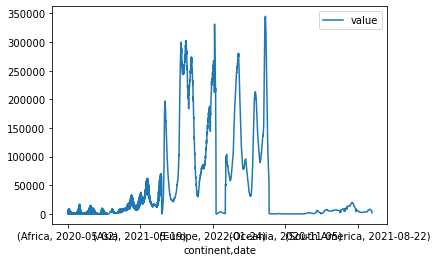

In [115]:
corona.plot()

In [109]:
corona.head()

value
continent date                
Africa    2020-05-02   273.480
          2020-05-09   396.495
          2020-05-16   469.695
          2020-05-23  1099.004
          2020-05-30  1449.750

In [91]:
#corona.loc["Africa"].loc[:'date']

corona.head()

value
continent date                
Africa    2020-05-02   273.480
          2020-05-09   396.495
          2020-05-16   469.695
          2020-05-23  1099.004
          2020-05-30  1449.750